<a href="https://colab.research.google.com/github/Seema1004/Assignment/blob/main/Project_Step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#initialize the libraries
!pip install scikit-learn

!pip install lazypredict #AutoAI generator

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.io import arff

from sklearn.metrics import precision_score, recall_score, f1_score #import the missing functions

In [99]:
df = pd.read_csv("AirTravelSatisfaction_SPR25.csv")

In [100]:
# # Basic preprocessing
#df['Experience'] = df['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_clean = df.copy()

In [101]:
df_clean.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'InflightWifiService', 'ArrivalDelay',
       'Frequent Flyer Miles', 'Travel Purpose Detail'],
      dtype='object')

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4999 non-null   int64  
 1   Gender                             4999 non-null   object 
 2   Customer Type                      4999 non-null   object 
 3   Age                                4999 non-null   int64  
 4   Type of Travel                     4999 non-null   object 
 5   Class                              4999 non-null   object 
 6   Flight Distance                    4999 non-null   int64  
 7   Inflight wifi service              4999 non-null   int64  
 8   Departure/Arrival time convenient  4999 non-null   int64  
 9   Ease of Online booking             4750 non-null   float64
 10  Gate location                      4999 non-null   int64  
 11  Food and drink                     4999 non-null   int64

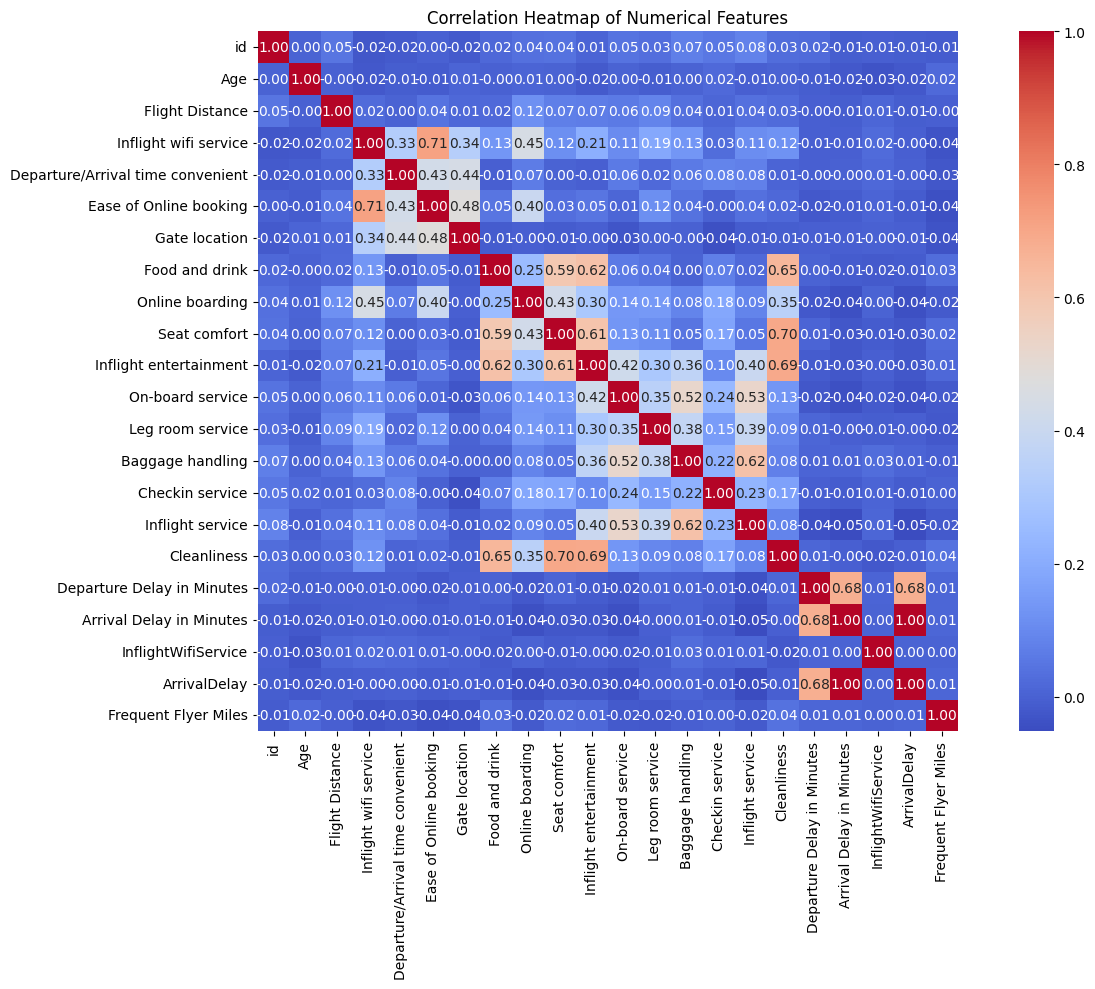

In [103]:
# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
numerical_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

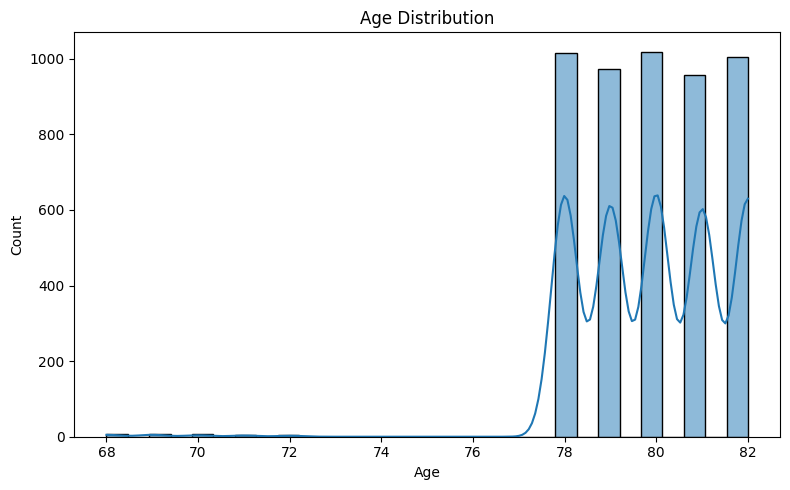

In [11]:
# 1. Histogram for numerical attribute: Age
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



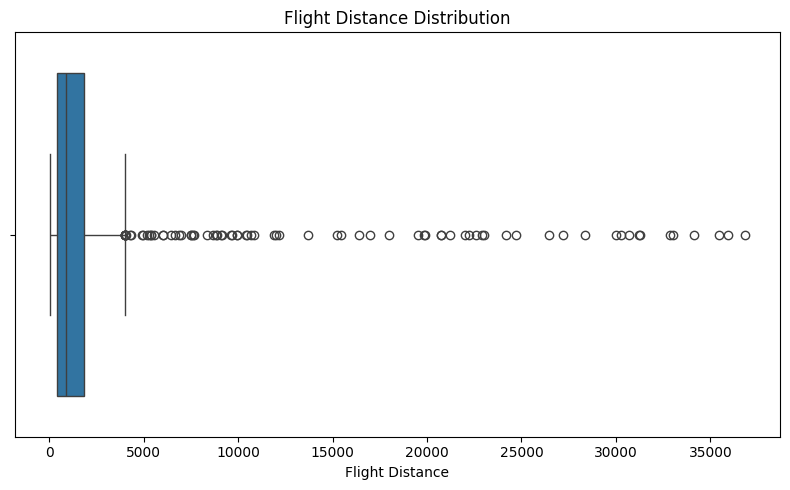

In [12]:
# 2. Boxplot for Flight Distance
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['Flight Distance'])
plt.title("Flight Distance Distribution")
plt.tight_layout()
plt.show()

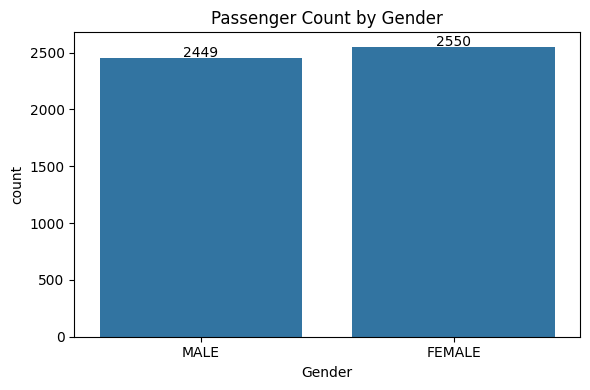

In [13]:
# 3. Bar Chart: Gender
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_clean, x='Gender')
plt.title("Passenger Count by Gender")

# Annotate the bar chart
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count + 10, str(count), ha="center")

plt.tight_layout()
plt.show()

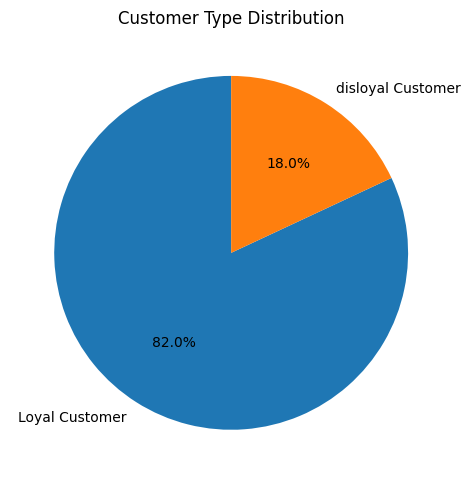

In [14]:
# 4. Pie Chart: Customer df
customer_type_counts = df_clean['Customer Type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Type Distribution")
plt.tight_layout()
plt.show()

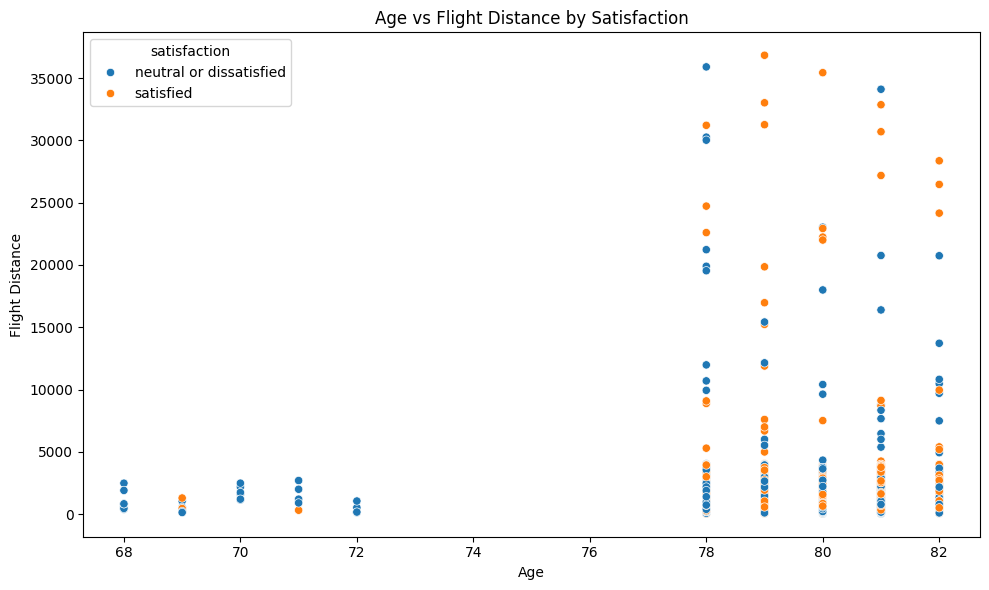

In [15]:

# 5. Scatter Plot: Age vs Flight Distance colored by Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='Flight Distance', hue='satisfaction')
plt.title("Age vs Flight Distance by Satisfaction")
plt.tight_layout()
plt.show()


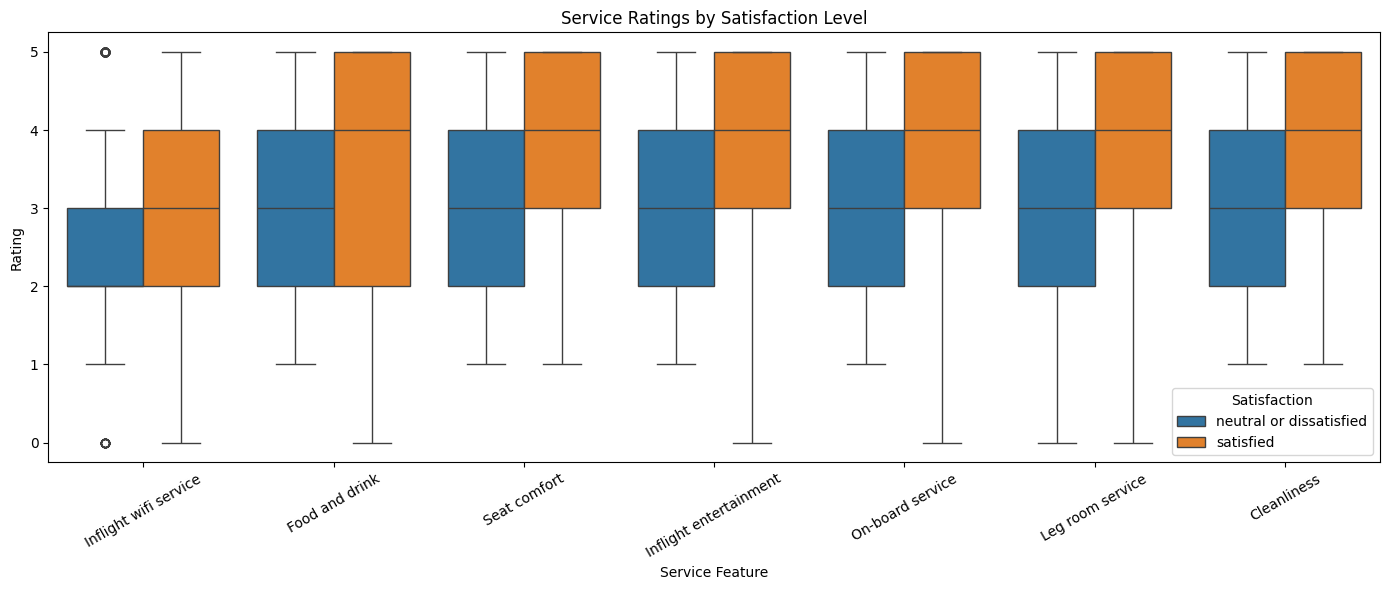

In [16]:
# 6. Boxplots for service ratings by satisfaction
service_columns = [
    'Inflight wifi service', 'Food and drink', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Cleanliness'
]

melted_df = df_clean.melt(
    id_vars='satisfaction',
    value_vars=service_columns,
    var_name='Service Feature',
    value_name='Rating'
)

# Plot all services in one chart
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x='Service Feature', y='Rating', hue='satisfaction')
plt.title("Service Ratings by Satisfaction Level")
plt.xticks(rotation=30)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

# for feature in service_columns:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(data=df, x='satisfaction', y=feature)
#     plt.title(f"{feature} Ratings by Satisfaction")
#     plt.tight_layout()
#     plt.show()


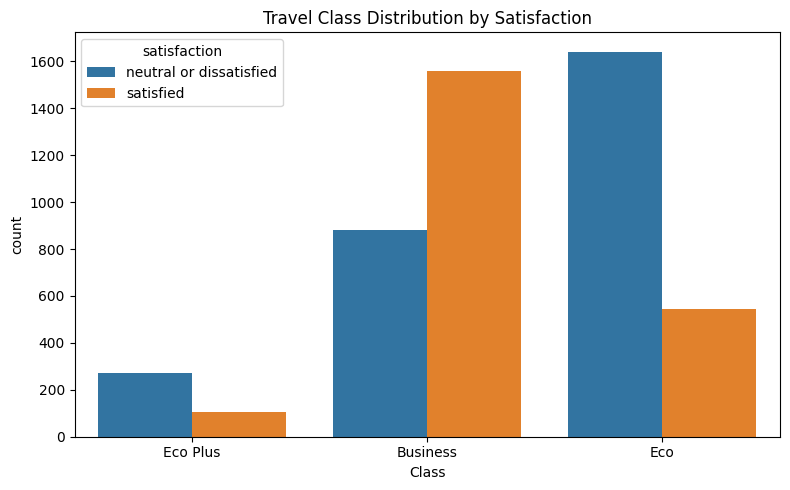

In [17]:
# 7. Bar chart: Travel Class Distribution by Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Class', hue='satisfaction')
plt.title("Travel Class Distribution by Satisfaction")
plt.tight_layout()
plt.show()

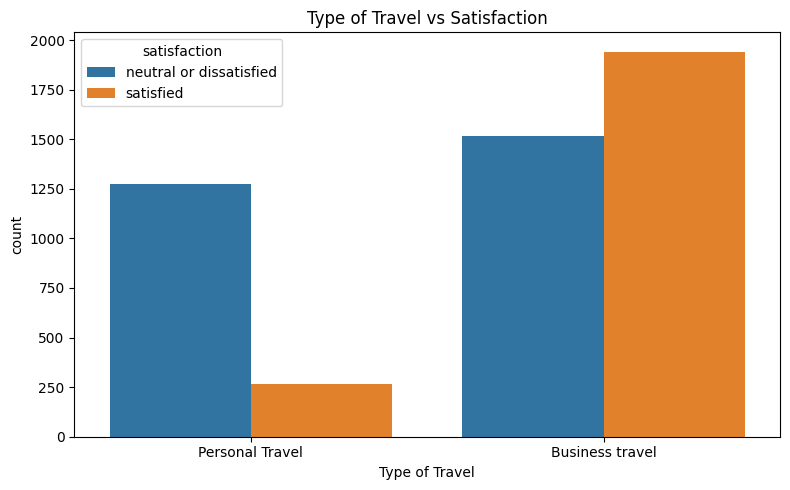

In [18]:
# 8. Bar chart: Type of Travel by Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Type of Travel', hue='satisfaction')
plt.title("Type of Travel vs Satisfaction")
plt.tight_layout()
plt.show()

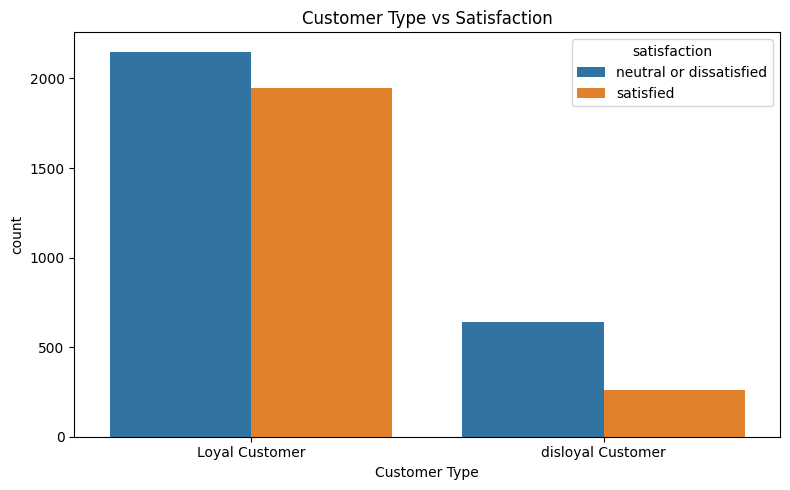

In [19]:
# 9. Bar chart: Customer Type by Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Customer Type', hue='satisfaction')
plt.title("Customer Type vs Satisfaction")
plt.tight_layout()
plt.show()

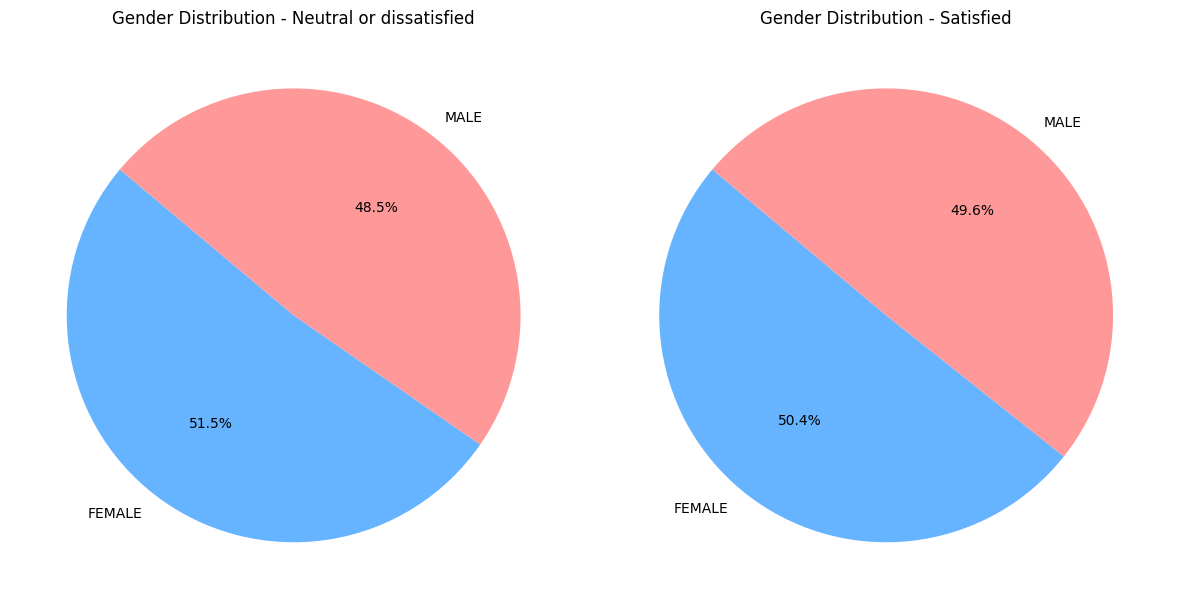

In [20]:
# 10. Bar chart: Gender by Satisfaction
gender_satisfaction_counts = df_clean.groupby(['Gender', 'satisfaction']).size().unstack().fillna(0)

# Plot pie charts for each satisfaction category
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

colors = ['#66b3ff', '#ff9999']

for i, column in enumerate(gender_satisfaction_counts.columns):
    axes[i].pie(
        gender_satisfaction_counts[column],
        labels=gender_satisfaction_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140
    )
    axes[i].set_title(f"Gender Distribution - {column.capitalize()}")

plt.tight_layout()



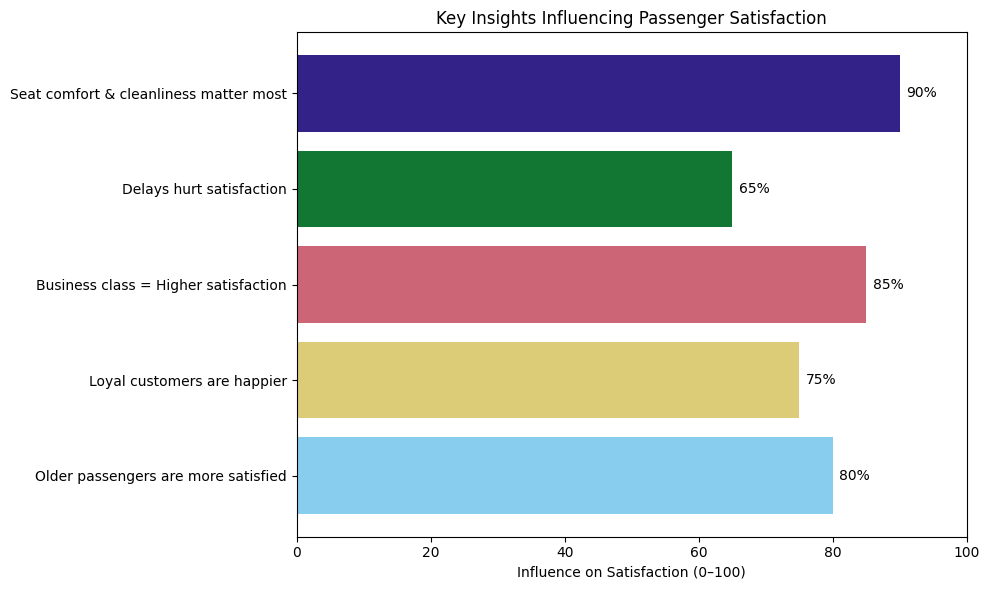

In [21]:
# Data for infographic-style summary
categories = [
    "Older passengers are more satisfied",
    "Loyal customers are happier",
    "Business class = Higher satisfaction",
    "Delays hurt satisfaction",
    "Seat comfort & cleanliness matter most"
]
values = [80, 75, 85, 65, 90]  # Hypothetical impact scores

colors = ['#88CCEE', '#DDCC77', '#CC6677', '#117733', '#332288']

plt.figure(figsize=(10, 6))
bars = plt.barh(categories, values, color=colors)
plt.xlabel("Influence on Satisfaction (0–100)")
plt.title("Key Insights Influencing Passenger Satisfaction")

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f'{width}%', va='center')

plt.xlim(0, 100)
plt.tight_layout()

**DATA PREPARATION**

In [104]:
#connverting gender to a ecoded value - MALE - 0 , FEMALE - 1

df_clean['Gender_encoded'] = df_clean['Gender'].map({'MALE': 0, 'FEMALE': 1})


In [105]:
df_clean.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'InflightWifiService', 'ArrivalDelay',
       'Frequent Flyer Miles', 'Travel Purpose Detail', 'Gender_encoded'],
      dtype='object')

In [106]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,249


In [107]:
df_clean = df_clean.drop(columns=['Ease of Online booking',
    'Inflight wifi service',
    'Flight Distance',
    'Ease of Online booking',
    'Baggage handling',
    'ArrivalDelay','id','Class'])

In [108]:
df_clean['Experience'] = df_clean['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')

In [109]:
df_clean.columns


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Departure/Arrival time convenient', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction', 'InflightWifiService',
       'Frequent Flyer Miles', 'Travel Purpose Detail', 'Gender_encoded',
       'Experience'],
      dtype='object')

In [110]:
#2. Departure_Delay_Category
#Groups delay time into:'Short' (0–15 minutes) 'Medium' (16–60 minutes)'Long' (over 60 minutes)
#Useful for converting a wide numerical range into clear categories.

df_clean['Departure_Delay_Category'] = pd.cut(
    df_clean['Departure Delay in Minutes'],
    bins=[-1, 15, 60, float('inf')],
    labels=['Short', 'Medium', 'Long']
)


In [111]:
#start with filling missing values - median for numerical column and mode for categorical column

#df_clean['Ease of Online booking'] = df_clean['Ease of Online booking'].fillna(df_clean['Ease of Online booking'].median())


In [ ]:
#df_clean['Cleanliness'] = df_clean['Cleanliness'].fillna(df_clean['Cleanliness'].median())

In [ ]:
#df_clean['Leg room service'] = df_clean['Leg room service'].fillna(df_clean['Leg room service'].median())
#df_clean['Baggage handling'] = df_clean['Baggage handling'].fillna(df_clean['Baggage handling'].median())

In [112]:
# 1. Handle missing numeric columns using median
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].fillna(
    df_clean['Arrival Delay in Minutes'].median())

df_clean['Frequent Flyer Miles'] = df_clean['Frequent Flyer Miles'].fillna(
    df_clean['Frequent Flyer Miles'].median())

# 2. Handle missing categorical columns using mode
df_clean['Travel Purpose Detail'] = df_clean['Travel Purpose Detail'].fillna(
    df_clean['Travel Purpose Detail'].mode()[0])

In [113]:
df_clean.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Departure/Arrival time convenient,0
Gate location,0
Food and drink,0
Online boarding,0
Seat comfort,0
Inflight entertainment,0


In [116]:
#normalize numerical columns - These columns have wide range of values hence need
#to normalize them for algorithms to not be distorted. The values range between 0-1 for these columns
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
cols_to_normalize = [
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Frequent Flyer Miles'
]

scaler = MinMaxScaler()
df_clean[cols_to_normalize] = scaler.fit_transform(df_clean[cols_to_normalize])

# Preview result
df_clean[cols_to_normalize].head()

,Departure Delay in Minutes,Arrival Delay in Minutes,Frequent Flyer Miles
0,0.01,0.03,0.32
1,0.00,0.01,0.02
2,0.00,0.00,0.76
3,0.01,0.02,0.89
4,0.00,0.00,0.23


In [117]:
df_clean.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Departure/Arrival time convenient,0
Gate location,0
Food and drink,0
Online boarding,0
Seat comfort,0
Inflight entertainment,0


In [118]:
df_clean

,Gender,Customer Type,Age,Type of Travel,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,InflightWifiService,Frequent Flyer Miles,Travel Purpose Detail,Gender_encoded,Experience,Departure_Delay_Category
0,MALE,Loyal Customer,82,Personal Travel,4,1,5,3,5,5,...,5.00,0.01,0.03,neutral or dissatisfied,0,0.32,Leisure,0,Not Satisfied,Medium
1,MALE,disloyal Customer,79,Business travel,2,3,1,3,1,1,...,1.00,0.00,0.01,neutral or dissatisfied,1,0.02,Conference,0,Not Satisfied,Short
2,FEMALE,Loyal Customer,80,Business travel,2,2,5,5,5,5,...,5.00,0.00,0.00,satisfied,5,0.76,Leisure,1,Satisfied,Short
3,FEMALE,Loyal Customer,79,Business travel,5,5,2,2,2,2,...,2.00,0.01,0.02,satisfied,0,0.89,Leisure,1,Satisfied,Short
4,MALE,Loyal Customer,79,Business travel,3,3,4,5,5,3,...,3.00,0.00,0.00,satisfied,5,0.23,Family Visit,0,Satisfied,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,MALE,Loyal Customer,81,Personal Travel,1,3,4,1,4,4,...,4.00,0.00,0.00,neutral or dissatisfied,2,0.60,Work Trip,0,Not Satisfied,Short
4995,FEMALE,Loyal Customer,78,Business travel,2,2,4,5,5,4,...,3.00,0.00,0.00,neutral or dissatisfied,2,0.19,Family Visit,1,Not Satisfied,Short
4996,FEMALE,Loyal Customer,80,Personal Travel,4,1,2,5,5,5,...,5.00,0.02,0.06,neutral or dissatisfied,2,0.73,Work Trip,1,Not Satisfied,Medium
4997,FEMALE,disloyal Customer,81,Business travel,5,3,2,2,2,2,...,2.00,0.00,0.00,neutral or dissatisfied,3,0.79,Family Visit,1,Not Satisfied,Short


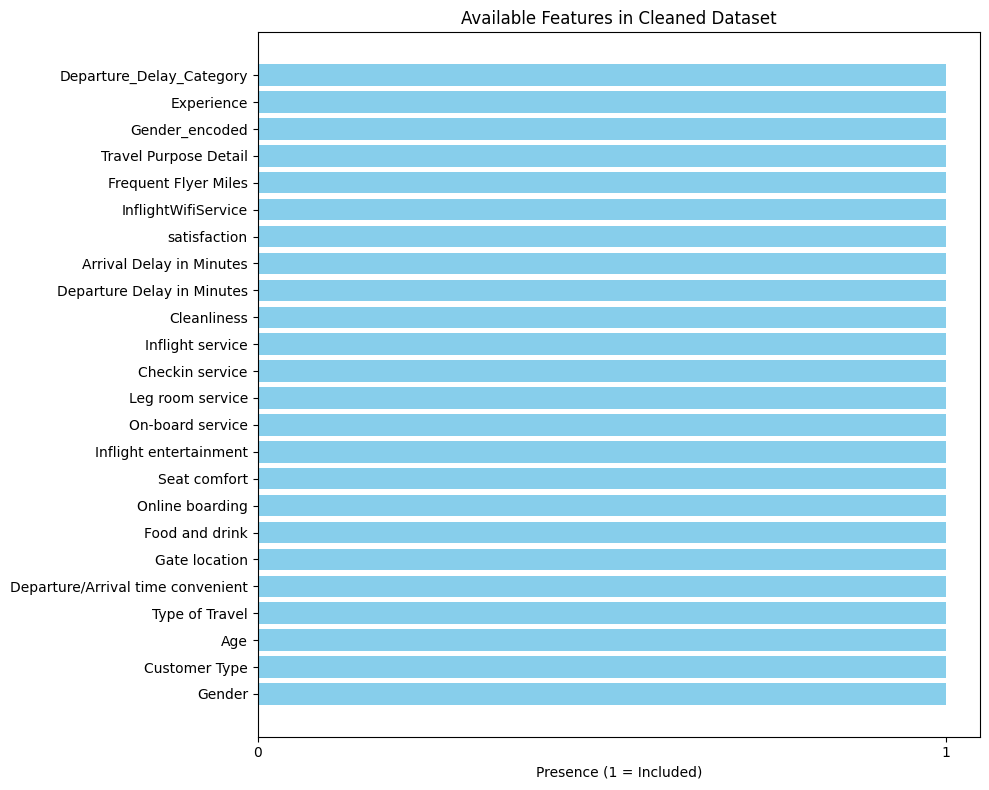

In [120]:
# Get the list of column names
columns = df_clean.columns.tolist()

# Create dummy counts (all 1s) just to plot the column names
counts = [1] * len(columns)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(columns, counts, color='skyblue')
plt.title("Available Features in Cleaned Dataset")
plt.xlabel("Presence (1 = Included)")
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

**Feature Engineering**

In [125]:
#here creating new columns based on the data set
#1.Sum of all customer-rated service features (e.g., Wi-Fi, seat comfort, food).
#Ranges vary depending on how many components were scored.
#Helps the model understand overall customer experience.

service_cols = [
    'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness', 'Inflight service', 'InflightWifiService'
]
df_clean['Service_Total'] = df_clean[service_cols].sum(axis=1)

In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             4999 non-null   object  
 1   Customer Type                      4999 non-null   object  
 2   Age                                4999 non-null   int64   
 3   Type of Travel                     4999 non-null   object  
 4   Departure/Arrival time convenient  4999 non-null   int64   
 5   Gate location                      4999 non-null   int64   
 6   Food and drink                     4999 non-null   int64   
 7   Online boarding                    4999 non-null   int64   
 8   Seat comfort                       4999 non-null   int64   
 9   Inflight entertainment             4999 non-null   int64   
 10  On-board service                   4999 non-null   int64   
 11  Leg room service                   4750 non

In [126]:
#3.create a simple flag to decide if the flight is delayed or not
df_clean['IsDelayed'] = df_clean['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0 else 0)

In [127]:
df_clean.to_csv("prepared_air_travel_dataset.csv", index=False)

**DATA MODELING**

In [128]:
# The idea is to use 6 different models and check which one suits better for the dataset

#1. Logistic Regression

#this needs more cleanup -

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [131]:
label_encoder = LabelEncoder()
df_clean['Encoded_Experience'] = label_encoder.fit_transform(df_clean['Experience']) #1-Satisfied, 0 - Not Satisfied

df_clean['Customer Type'] = label_encoder.fit_transform(df_clean['Customer Type'])

df_clean['Type of Travel'] = label_encoder.fit_transform(df_clean['Type of Travel'])

#df_clean['Class'] = label_encoder.fit_transform(df_clean['Class'])

df_clean['Travel Purpose Detail'] = label_encoder.fit_transform(df_clean['Travel Purpose Detail'])

df_clean['Departure_Delay_Category'] = label_encoder.fit_transform(df_clean['Departure_Delay_Category'])

#df_clean['Baggage handling'] = df_clean['Baggage handling'].fillna(df_clean['Baggage handling'].median())

#model training
X = df_clean.drop(columns = ["satisfaction", "Gender",'InflightWifiService', "Encoded_Experience", "Experience",  'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness', 'Inflight service' ], axis=1)
y = df_clean['Encoded_Experience']

#normalize the numeric columns
numeric_cols = X.select_dtypes(include='number').columns
df_clean[numeric_cols].describe()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
# Check for NaNs in X_train before training
print("Checking for NaNs in X_train before training:")
print(X_train.isnull().sum().sort_values(ascending=False).head())


Checking for NaNs in X_train before training:
Customer Type                        0
Age                                  0
Type of Travel                       0
Departure/Arrival time convenient    0
Gate location                        0
dtype: int64


In [133]:
X_train.columns

Index(['Customer Type', 'Age', 'Type of Travel',
       'Departure/Arrival time convenient', 'Gate location', 'Online boarding',
       'Checkin service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Frequent Flyer Miles',
       'Travel Purpose Detail', 'Gender_encoded', 'Departure_Delay_Category',
       'Service_Total', 'IsDelayed'],
      dtype='object')

In [134]:
X_train.isnull().sum()

,0
Customer Type,0
Age,0
Type of Travel,0
Departure/Arrival time convenient,0
Gate location,0
Online boarding,0
Checkin service,0
Departure Delay in Minutes,0
Arrival Delay in Minutes,0
Frequent Flyer Miles,0


In [135]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize and Train the Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = logreg.predict(X_test)

# Step 3: Evaluate the Model
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred):.4f}")

🔍 Confusion Matrix:
[[682 116]
 [213 489]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.76      0.85      0.81       798
    Satisfied       0.81      0.70      0.75       702

     accuracy                           0.78      1500
    macro avg       0.79      0.78      0.78      1500
 weighted avg       0.78      0.78      0.78      1500


✅ Accuracy Score: 0.7807

✅ Recall Score: 0.6966

✅ Precision Score: 0.8083

✅ F1 Score: 0.7483


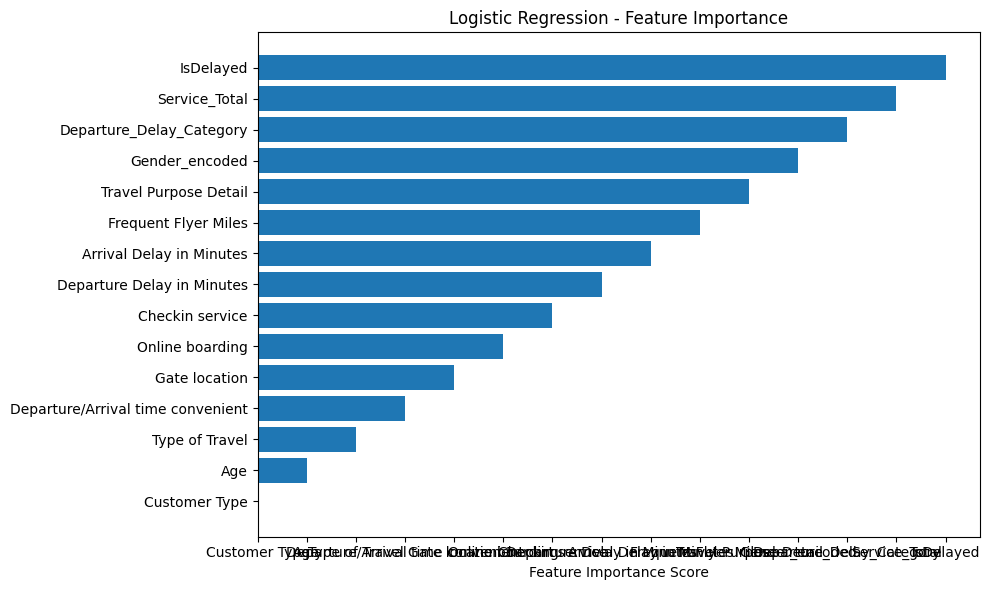

In [136]:
feature_importance = logreg.feature_names_in_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Logistic Regression - Feature Importance")
plt.tight_layout()
plt.show()

Overall, the model is 79% accurate. - With more inclination to detect if the customer is dissatisfied.


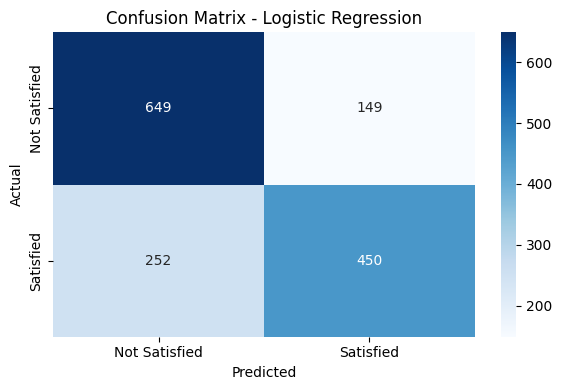

In [57]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Satisfied', 'Satisfied']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [58]:
#2. KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

In [59]:
# You can start with k=11 (default) or experiment
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [95]:
y_pred_knn = knn.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

🔍 Confusion Matrix:
[[681 117]
 [291 411]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.70      0.85      0.77       798
    Satisfied       0.78      0.59      0.67       702

     accuracy                           0.73      1500
    macro avg       0.74      0.72      0.72      1500
 weighted avg       0.74      0.73      0.72      1500


✅ Accuracy Score: 0.7280

✅ Accuracy Score: 0.7280

✅ Recall Score: 0.5855

✅ Precision Score: 0.7784

✅ F1 Score: 0.6683


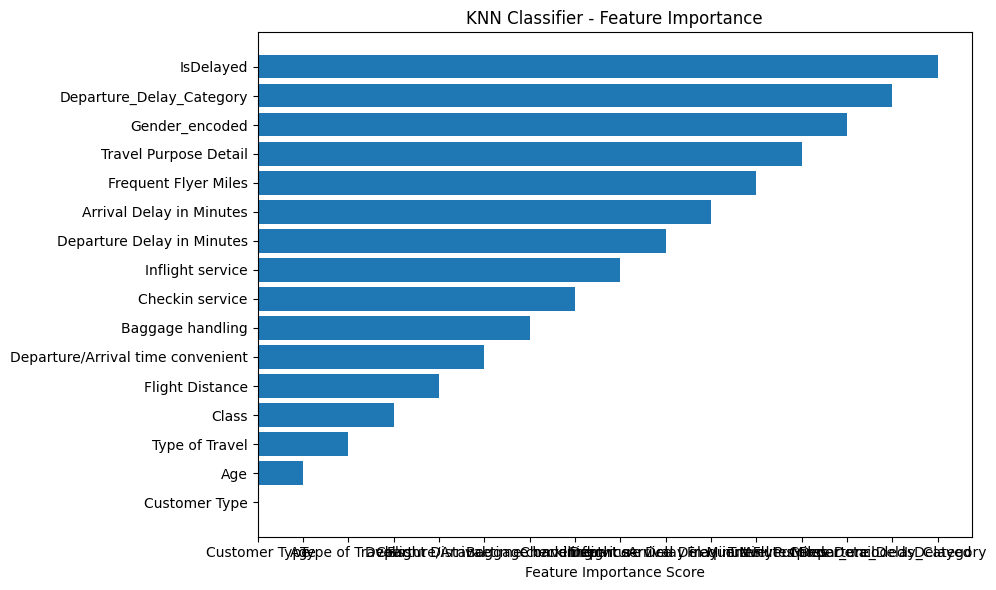

In [61]:
feature_importance = knn.feature_names_in_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("KNN Classifier - Feature Importance")
plt.tight_layout()
plt.show()

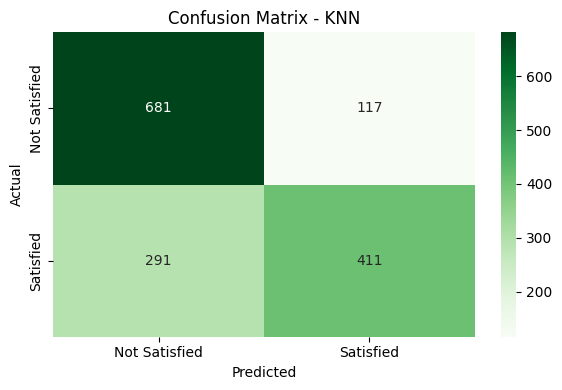

In [62]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['Not Satisfied', 'Satisfied']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [63]:
#3. Use the decision tree model

from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred_dt):.4f}")


🔍 Confusion Matrix:
[[566 232]
 [261 441]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.68      0.71      0.70       798
    Satisfied       0.66      0.63      0.64       702

     accuracy                           0.67      1500
    macro avg       0.67      0.67      0.67      1500
 weighted avg       0.67      0.67      0.67      1500


✅ Accuracy Score: 0.6713

✅ Accuracy Score: 0.6713

✅ Recall Score: 0.6282

✅ Precision Score: 0.6553

✅ F1 Score: 0.6415


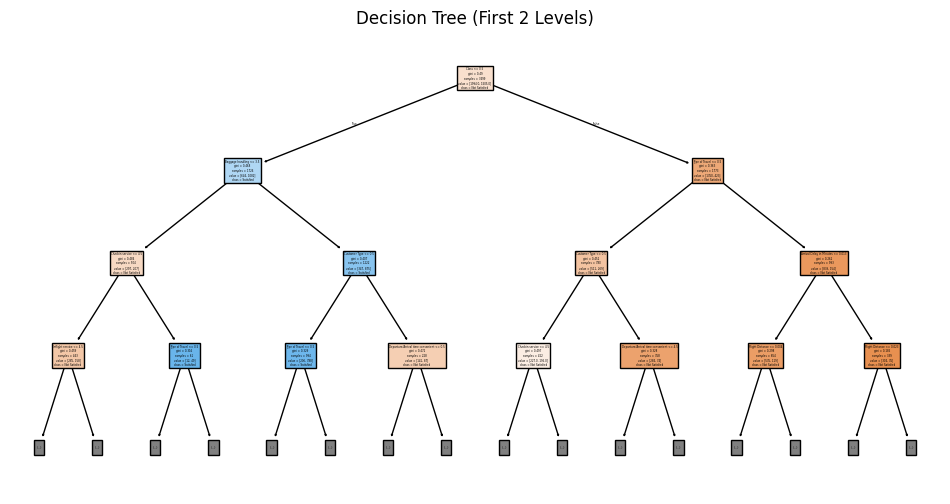

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dtree, max_depth=3, feature_names=X.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

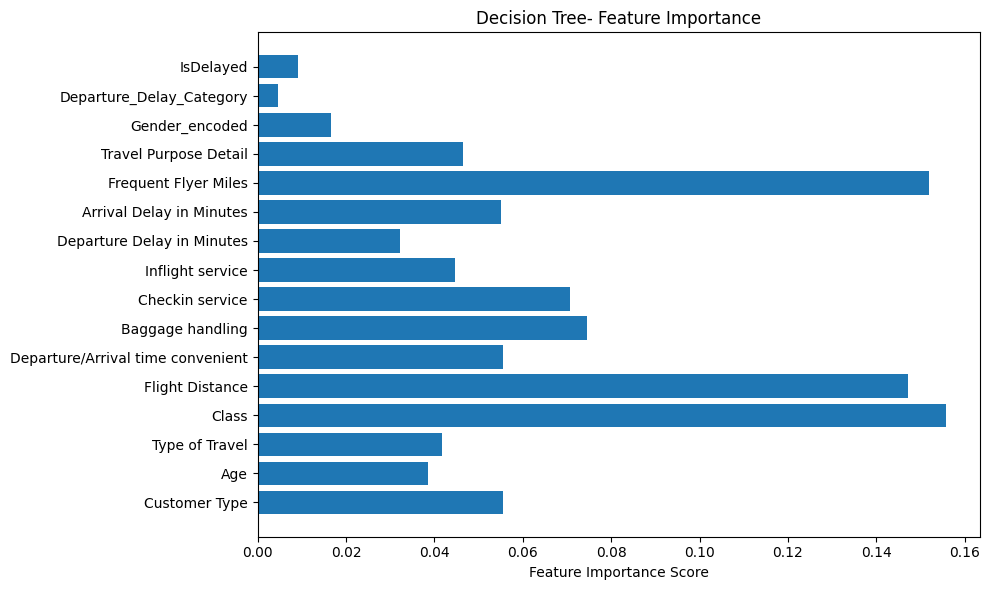

In [67]:
feature_importance = dtree.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Decision Tree- Feature Importance")
plt.tight_layout()
plt.show()

In [68]:
#4. Random Forest Classifier

# Train Random Forest Model
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [69]:
# Evaluate Model
y_pred = clf.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Predicted    0    1
Actual             
0          712   86
1          253  449


In [70]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Individual metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
 [[712  86]
 [253 449]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       798
           1       0.84      0.64      0.73       702

    accuracy                           0.77      1500
   macro avg       0.79      0.77      0.77      1500
weighted avg       0.79      0.77      0.77      1500

Accuracy: 0.77
Precision: 0.84
Recall: 0.64
F1-Score: 0.73


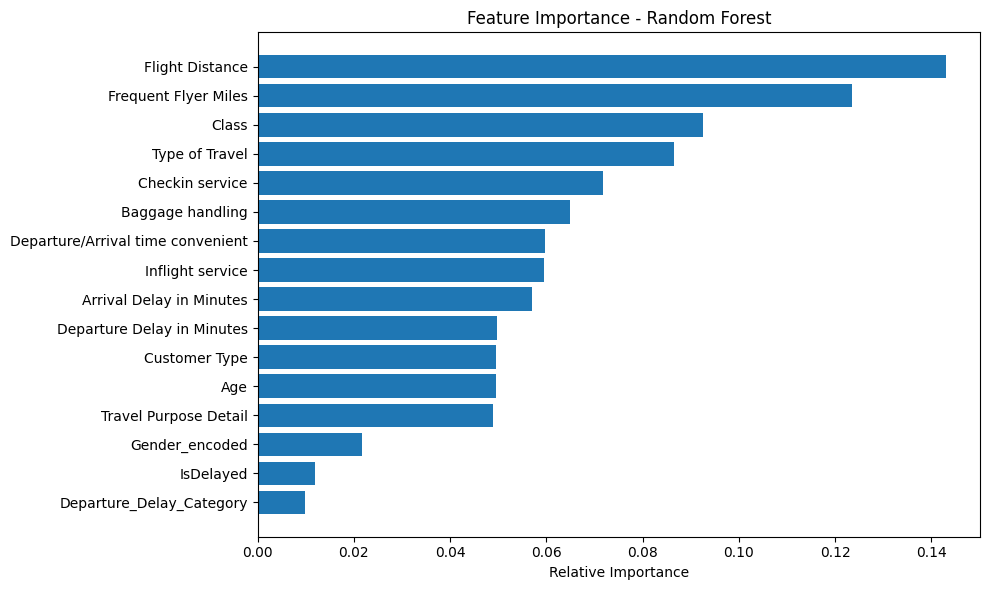

In [71]:
# Get feature importances
importances = clf.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
#Inspect using AUTO AI

In [72]:
pip install xgboost

In [73]:
from xgboost import XGBClassifier

In [74]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # use_label_encoder=False to suppress warning
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:29:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [75]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)


print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.76
Accuracy: 0.77
Precision: 0.80
Recall: 0.66
F1-Score: 0.72


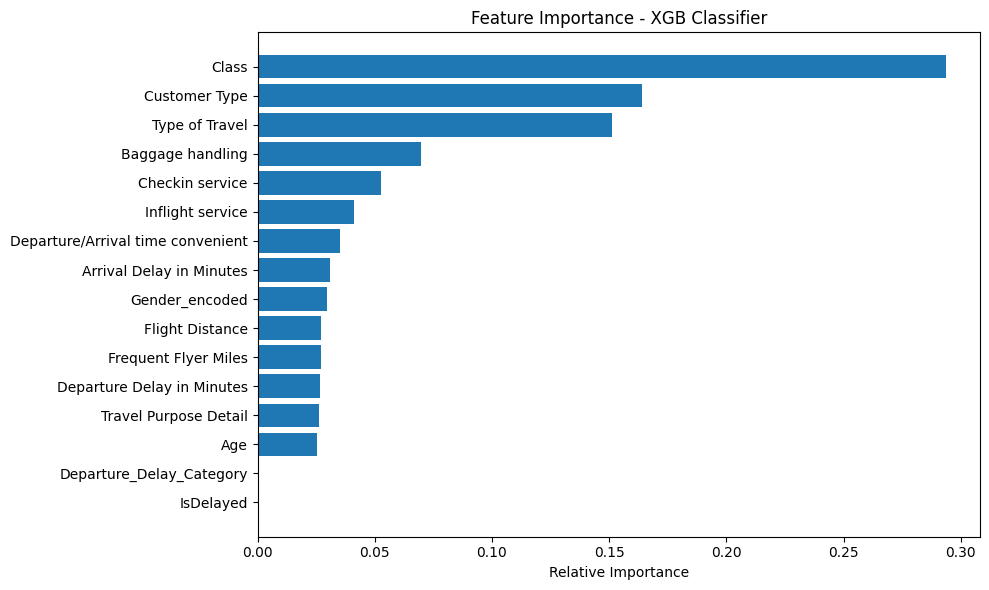

In [76]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - XGB Classifier')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [77]:
from lazypredict.Supervised import LazyClassifier

In [78]:

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LazyPredict model benchmarking
autoAI = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = autoAI.fit(X_train, X_test, y_train, y_test)

# Show model performance
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1505, number of negative: 1994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 3499, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430123 -> initscore=-0.281350
[LightGBM] [Info] Start training from score -0.281350
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.77               0.77     0.77      0.77   
ExtraTreesClassifier               0.77               0.76     0.76      0.76   
XGBClassifier                      0.76               0.76     0.76      0.76   
LGBMClassifier                     0.76  

In [83]:
from sklearn.ensemble import GradientBoostingClassifier


In [84]:
# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [85]:
y_pred = gb_model.predict(X_test)

In [88]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7706666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       798
           1       0.83      0.64      0.72       702

    accuracy                           0.77      1500
   macro avg       0.78      0.76      0.76      1500
weighted avg       0.78      0.77      0.77      1500


Confusion Matrix:
 [[705  93]
 [251 451]]


In [89]:
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.77
Precision: 0.83
Recall: 0.64
F1-Score: 0.72


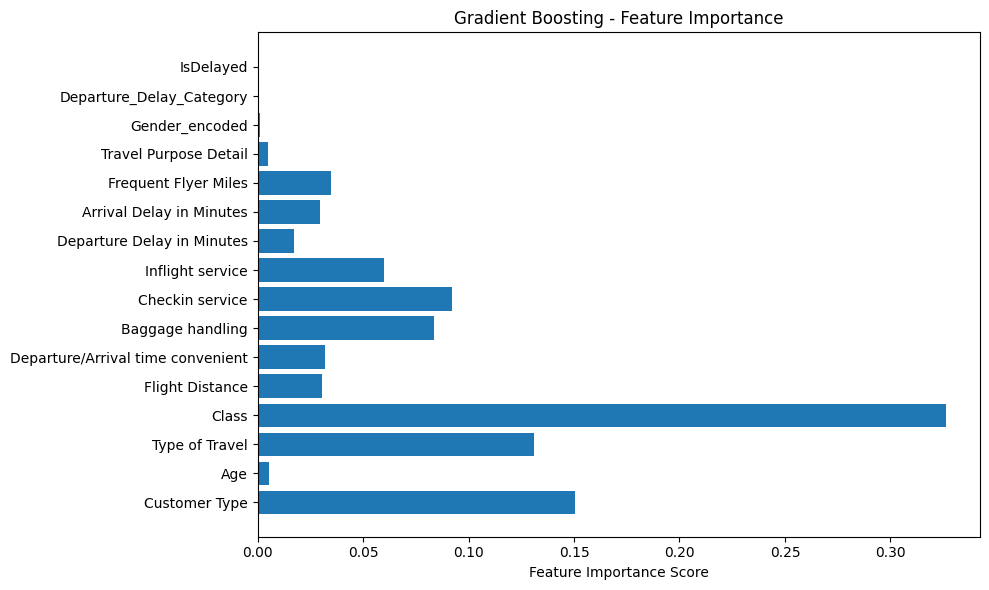

In [90]:
feature_importance = gb_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Gradient Boosting - Feature Importance")
plt.tight_layout()
plt.show()